In [1]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from rouge import Rouge
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_sgd = pd.read_csv('/content/drive/MyDrive/project/result/SGD_Regressor(rouge-1_rouge-2_rouge-l).csv')
df_distilbart = pd.read_csv('/content/drive/MyDrive/project/result/Abstract_Summarization_using_distilbart-cnn-12-6.csv')
df_bert = pd.read_csv('/content/drive/MyDrive/project/result/BERT_Extractive_Text_Summarization(rouge-1_rouge-2_rouge-l).csv')
df_gpt2 = pd.read_csv('/content/drive/MyDrive/project/result/GPT2_Extractive_Text_Summarization(rouge-1_rouge-2_rouge-l).csv')
df_t5 = pd.read_csv('/content/drive/MyDrive/project/result/T5_Abstractive_Text_Summarization(rouge-1_rouge-2_rouge-l).csv')

In [4]:
df_sgd.head()

,Unnamed: 0,Unnamed: 0.1,FileName,Abstract,Summary,MAE,RMSE,R2_Score,Precision,Recall,F_Score,Actual_Score,Predicted_score,Precision_rouge2,Recall_rouge2,F1_Score_rouge2,Precision_rougel,Recall_rougel,F1_Score_rougel
0,0,0,S0168874X14001413,The topic of the paper is related to the macr...,The truncation order of the series in the KM ...,0.149267,0.196305,-1.616955,0.329167,0.296065,0.311741,"[0.5, 0.5, 0.6015109466333858, 0.5, 0.5, 0.5, ...","[0.6474461156187198, 0.5735670630534271, 0.581...",0.026316,0.025907,0.026110,0.135922,0.111111,0.122271
1,1,1,S0168874X14001425,Multi-scale finite element (FE) modeling and ...,"In surfacing coupling, there is no overlappin...",0.110564,0.168150,-1.441059,0.346032,0.592391,0.436875,"[0.5774953651858118, 0.6224593312018546, 0.5, ...","[0.5999236320166548, 0.5644561780585866, 0.611...",0.119048,0.078534,0.094637,0.314607,0.229508,0.265403
2,2,2,S0168874X14001437,Automotive door sealing system isolates passe...,Automotive door seals are installed in narrow ...,0.170231,0.218223,-1.186426,0.213260,0.763994,0.333444,"[0.5, 0.589920409262554, 0.8091419557551346, 0...","[0.6918761867149563, 0.6060526916474253, 0.515...",0.154639,0.049834,0.075377,0.379747,0.153846,0.218978
3,3,3,S0168874X14001516,Topology optimization problem requires repeat...,(12) and Eq. (18) ( { j e } T + k = 1 r k { r...,0.083261,0.105330,-0.659592,0.235046,0.513812,0.322544,"[0.7057850278370112, 0.574442516811659, 0.6390...","[0.5518199498718767, 0.5958659581278032, 0.659...",0.068966,0.037267,0.048387,0.267857,0.144231,0.187500
4,4,4,S0168874X14001528,Accuracy and efficiency are significant facto...,The special properties of wavelet bases of HC...,0.111046,0.137062,-1.955143,0.352381,0.374494,0.363102,"[0.6418340450887311, 0.598687660112452, 0.6607...","[0.6431160183664509, 0.4905257913101094, 0.339...",0.005988,0.008333,0.006969,0.155340,0.192771,0.172043


In [5]:
df_bert.head()

,Unnamed: 0,Unnamed: 0.1,FileName,Abstract,Summary,Precision,Recall,F1_Score,Precision_rouge2,Recall_rouge2,F1_Score_rouge2,Precision_rougel,Recall_rougel,F1_Score_rougel
0,0,0,S0168874X14001516,Topology optimization problem requires repeat...,"Traditionally, the size and shape optimization...",0.742207,0.206905,0.323601,0.076190,0.248447,0.116618,0.170732,0.471154,0.250639
1,1,1,S0168874X14001528,Accuracy and efficiency are significant facto...,Wave propagation and load identification are t...,0.762857,0.177605,0.288130,0.059880,0.250000,0.096618,0.164875,0.554217,0.254144
2,2,2,S0168874X14001413,The topic of the paper is related to the macr...,Finite element analysis (FEA) of airframe unde...,0.693056,0.198488,0.308597,0.069030,0.191710,0.101509,0.190476,0.476190,0.272109
3,3,3,S0168874X14001437,Automotive door sealing system isolates passe...,Automotive door seals are installed in narrow ...,0.587416,0.324545,0.418095,0.086806,0.166113,0.114025,0.243553,0.435897,0.312500
4,4,4,S0168874X14001425,Multi-scale finite element (FE) modeling and ...,Finite element (FE) modeling and analysis of a...,0.826667,0.169885,0.281850,0.138114,0.544503,0.220339,0.278736,0.795082,0.412766


In [6]:
df_gpt2.head()

,Unnamed: 0,Unnamed: 0.1,FileName,Abstract,Summary,Precision,Recall,F1_Score,Precision_rouge2,Recall_rouge2,F1_Score_rouge2,Precision_rougel,Recall_rougel,F1_Score_rougel
0,0,0,S0168874X14001516,Topology optimization problem requires repeat...,"Traditionally, the size and shape optimization...",0.754844,0.165466,0.271434,0.069091,0.236025,0.106892,0.159468,0.461538,0.237037
1,1,1,S0168874X14001528,Accuracy and efficiency are significant facto...,Wave propagation and load identification are t...,0.800000,0.147731,0.249407,0.045455,0.233333,0.076087,0.147692,0.578313,0.235294
2,2,2,S0168874X14001413,The topic of the paper is related to the macr...,Finite element analysis (FEA) of airframe unde...,0.707639,0.172070,0.276828,0.062718,0.186528,0.093872,0.177778,0.444444,0.253968
3,3,3,S0168874X14001437,Automotive door sealing system isolates passe...,Automotive door seals are installed in narrow ...,0.598395,0.304469,0.403590,0.071429,0.139535,0.094488,0.245614,0.430769,0.312849
4,4,4,S0168874X14001425,Multi-scale finite element (FE) modeling and ...,Finite element (FE) modeling and analysis of a...,0.831111,0.176059,0.290567,0.110973,0.465969,0.179255,0.226131,0.737705,0.346154


In [7]:
df_t5.head()

,Unnamed: 0,Unnamed: 0.1,FileName,Abstract,Summary,Precision,Recall,F1_Score,Precision_rouge2,Recall_rouge2,F1_Score_rouge2,Precision_rougel,Recall_rougel,F1_Score_rougel
0,0,0,S0168874X14001413,The topic of the paper is related to the macr...,a finite element. a super-element. a crack-tip...,0.129167,0.808696,0.222755,0.000000,0.000000,0.000000,0.300000,0.047619,0.082192
1,1,1,S0168874X14001425,Multi-scale finite element (FE) modeling and ...,the other components in the frame are simulate...,0.239365,0.685455,0.354824,0.000000,0.000000,0.000000,0.315789,0.098361,0.150000
2,2,2,S0168874X14001437,Automotive door sealing system isolates passe...,the door seals are installed in narrow gaps be...,0.168074,0.807302,0.278225,0.059701,0.013289,0.021739,0.326923,0.087179,0.137652
3,3,3,S0168874X14001516,Topology optimization problem requires repeat...,topology optimization has been applied to dyna...,0.281382,0.664016,0.395267,0.096154,0.031056,0.046948,0.317073,0.125000,0.179310
4,4,4,S0168874X14001528,Accuracy and efficiency are significant facto...,finite element based techniques have been of g...,0.302857,0.622309,0.407432,0.051724,0.025000,0.033708,0.333333,0.192771,0.244275


In [11]:

test = pd.read_csv('/content/drive/MyDrive/project/result/T5_Abstractive_Text_Summarization(rouge-1_rouge-2_rouge-l).csv')
test.head()

,Unnamed: 0,Unnamed: 0.1,FileName,Abstract,Summary,Precision,Recall,F1_Score,Precision_rouge2,Recall_rouge2,F1_Score_rouge2,Precision_rougel,Recall_rougel,F1_Score_rougel
0,0,0,S0168874X14001413,The topic of the paper is related to the macr...,a finite element. a super-element. a crack-tip...,0.129167,0.808696,0.222755,0.000000,0.000000,0.000000,0.300000,0.047619,0.082192
1,1,1,S0168874X14001425,Multi-scale finite element (FE) modeling and ...,the other components in the frame are simulate...,0.239365,0.685455,0.354824,0.000000,0.000000,0.000000,0.315789,0.098361,0.150000
2,2,2,S0168874X14001437,Automotive door sealing system isolates passe...,the door seals are installed in narrow gaps be...,0.168074,0.807302,0.278225,0.059701,0.013289,0.021739,0.326923,0.087179,0.137652
3,3,3,S0168874X14001516,Topology optimization problem requires repeat...,topology optimization has been applied to dyna...,0.281382,0.664016,0.395267,0.096154,0.031056,0.046948,0.317073,0.125000,0.179310
4,4,4,S0168874X14001528,Accuracy and efficiency are significant facto...,finite element based techniques have been of g...,0.302857,0.622309,0.407432,0.051724,0.025000,0.033708,0.333333,0.192771,0.244275


In [12]:
sgd_precision_mean = df_sgd['Precision'].mean()
bert_precision_mean = df_bert['Precision'].mean()
gpt2_precision_mean = df_gpt2['Precision'].mean()
# distilbart_precision_mean = df_distilbart['Precision'].mean()
t5_precision_mean = df_t5['Precision'].mean()


sgd_recall_mean = df_sgd['Recall'].mean()
bert_recall_mean = df_bert['Recall'].mean()
gpt2_recall_mean = df_gpt2['Recall'].mean()
# distilbart_recall_mean = df_distilbart['Recall'].mean()
t5_recall_mean = df_t5['Recall'].mean()

sgd_f1_score_mean = df_sgd['F_Score'].mean()
bert_f1_score_mean = df_bert['F1_Score'].mean()
gpt2_f1_score_mean = df_gpt2['F1_Score'].mean()
# distilbart_f1_score_mean = df_distilbart['F_Score'].mean()
t5_f1_score_mean = df_t5['F1_Score'].mean()

In [13]:
df = pd.DataFrame(columns = ['methods','evaluation_metrics','mean_value'])

,methods,evaluation_metrics,mean_value


In [14]:
df.loc[0] = pd.Series({'methods':'gensim','evaluation_metrics':'precision','mean_value':sgd_precision_mean})
df.loc[1] = pd.Series({'methods':'bert','evaluation_metrics':'precision','mean_value':bert_precision_mean})
df.loc[2] = pd.Series({'methods':'gpt2','evaluation_metrics':'precision','mean_value':gpt2_precision_mean})
df.loc[3] = pd.Series({'methods':'t5','evaluation_metrics':'precision','mean_value':t5_precision_mean})

df.loc[4] = pd.Series({'methods':'gensim','evaluation_metrics':'recall','mean_value':sgd_recall_mean})
df.loc[5] = pd.Series({'methods':'bert','evaluation_metrics':'recall','mean_value':bert_recall_mean})
df.loc[6] = pd.Series({'methods':'gpt2','evaluation_metrics':'recall','mean_value':gpt2_recall_mean})
df.loc[7] = pd.Series({'methods':'t5','evaluation_metrics':'recall','mean_value':t5_recall_mean})

df.loc[8] = pd.Series({'methods':'gensim','evaluation_metrics':'f1_score','mean_value':sgd_f1_score_mean})
df.loc[9] = pd.Series({'methods':'bert','evaluation_metrics':'f1_score','mean_value':bert_f1_score_mean})
df.loc[10] = pd.Series({'methods':'gpt2','evaluation_metrics':'f1_score','mean_value':gpt2_f1_score_mean})
df.loc[11] = pd.Series({'methods':'t5','evaluation_metrics':'f1_score','mean_value':t5_f1_score_mean})


In [15]:
df

,methods,evaluation_metrics,mean_value
0,gensim,precision,0.335373
1,bert,precision,0.702416
2,gpt2,precision,0.716149
3,t5,precision,0.228454
4,gensim,recall,0.546998
5,bert,recall,0.222951
6,gpt2,recall,0.205719
7,t5,recall,0.684601
8,gensim,f1_score,0.393013
9,bert,f1_score,0.304370


In [16]:
df.to_csv("/content/drive/MyDrive/project/images/rouge1.csv")

<Figure size 2880x1584 with 0 Axes>

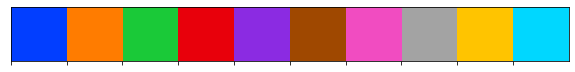

In [17]:
plt.figure(figsize=(40,22))# Save a palette to a variable:
palette = sns.color_palette("bright")

# Use palplot and pass in the variable:
sns.palplot(palette)

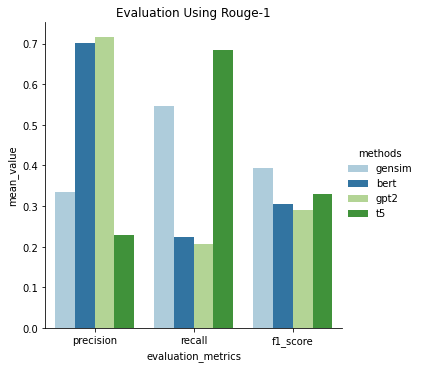

In [18]:
# Set the palette using the name of a palette:
sns.set_palette("Paired")
sns_plot = sns.catplot(x='evaluation_metrics', y = 'mean_value', hue = 'methods', data=df, kind='bar')
sns_plot.set(title = "Evaluation Using Rouge-1")
# fig = cat_plot.get_figure()
sns_plot.figure.savefig("/content/drive/MyDrive/project/images/rouge1_result.png")